Analisis de Ventas

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ventas = pd.read_csv('ventas.csv', sep=';')
ventas.head()

,Mes,Ventas
0,01-jan-2017,266.0
1,01-feb-2017,145.9
2,01-mar-2017,183.1
3,01-apr-2017,119.3
4,01-may-2017,180.3


In [4]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mes     36 non-null     object 
 1   Ventas  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


In [5]:
ventas['Mes'] = pd.to_datetime(ventas['Mes'], format='mixed')

In [6]:
ventas.head()

,Mes,Ventas
0,2017-01-01,266.0
1,2017-02-01,145.9
2,2017-03-01,183.1
3,2017-04-01,119.3
4,2017-05-01,180.3


In [7]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Mes     36 non-null     datetime64[ns]
 1   Ventas  36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 708.0 bytes


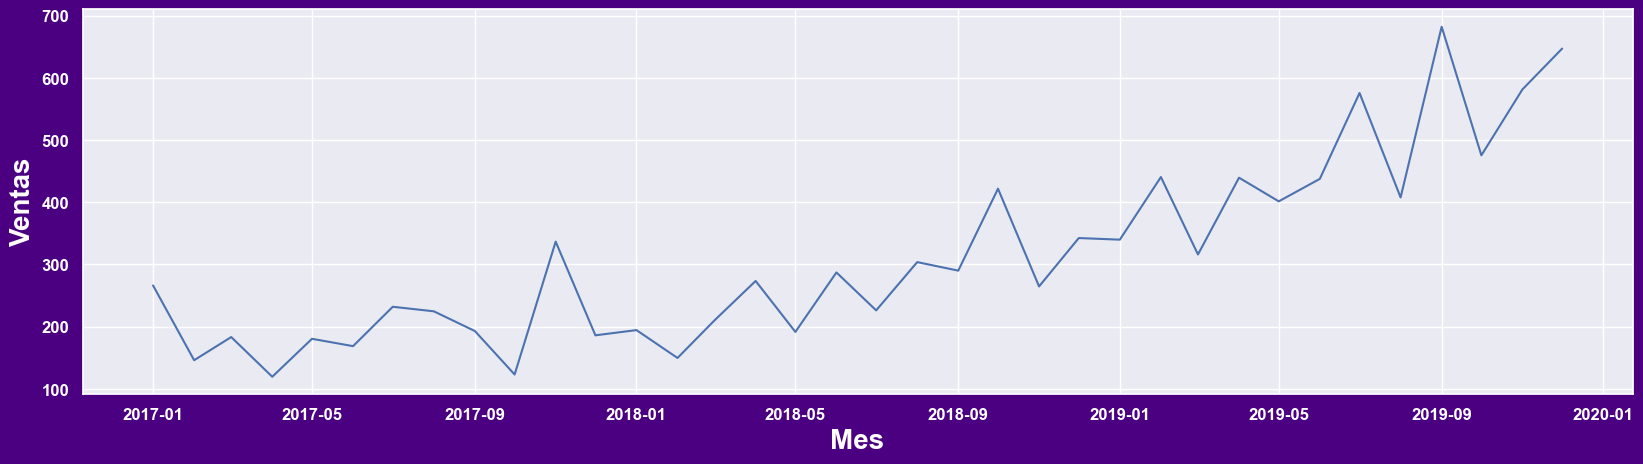

In [8]:
plt.figure(figsize=(20, 5), facecolor='indigo')
sns.set(style="darkgrid")
sns.lineplot(data=ventas, x='Mes', y='Ventas')
plt.xlabel(f'Mes', color='w', fontweight='bold', size=20)
plt.ylabel(f'Ventas', color='w',fontweight='bold', size=20)
plt.xticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje x sean más gruesos
plt.yticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje y sean más gruesos
plt.show()

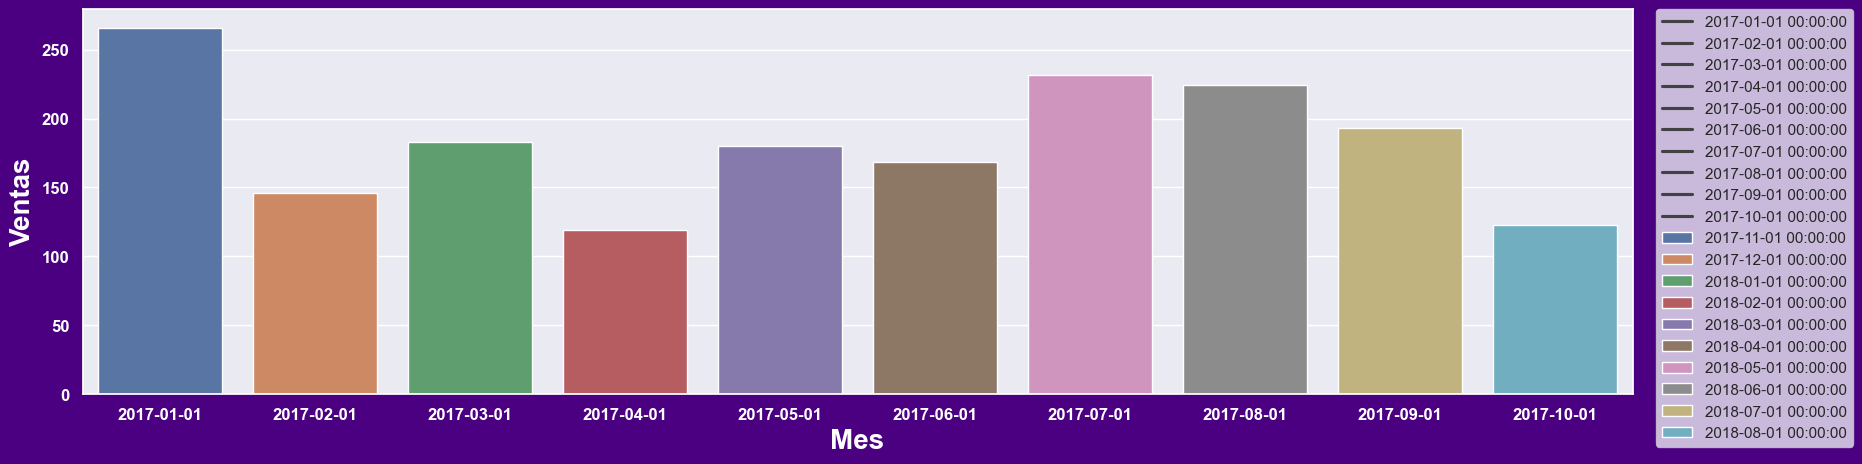

In [9]:
plt.figure(figsize=(20, 5), facecolor='indigo')
sns.set(style="darkgrid")
sns.barplot(data=ventas.head(10), x='Mes', y='Ventas', hue='Mes')
plt.xlabel(f'Mes', color='w', fontweight='bold', size=20)
plt.ylabel(f'Ventas', color='w',fontweight='bold', size=20)
plt.xticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje x sean más gruesos
plt.yticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje y sean más gruesos
plt.legend(ventas['Mes'],bbox_to_anchor=(1.01, 1.02), loc='upper left')
plt.show()

Pueden ocurrir casos en los que vamos a trabajar con una serie temporal y nos encontramos con datos nulos, tenemos varias formas de tratar estos valores.

Pensando en eso, comparto el siguiente archivo para que puedas conocer diferentes formas en las cuales podemos tratar este tipo de asuntos, link:

Las soluciones en el archivo son las siguientes:

Solución 1 - Llenar los datos nulos con el valor medio de ventas.

Solución 2 - Transformar los valores nulos en un valor específico.

Solución 3 - Remover datos nulos de la base o DataFrame.

Solución 4 - Llenar con el valor inmediatamente anterior o inmediatamente posterior.

Solución 5 - Interpolando datos nulos con un valor medio.

Lo que aprendimos en esta aula:

Dimos la definición de serie temporal y vimos sus componentes.
Mencionamos algunos campos en los cuales se usan las series temporales y el motivo por el cual se usan.
Importamos las bibliotecas necesarias de python para cargar archivos (pandas) y crear gráficos (seaborn).
Aprendimos a transformar una columna con fecha del formato object para el formato datetime con la función de pandas pd.to_datetime().

In [10]:
def grafico(titulo, x, y , xlabel, ylabel):
    plt.figure(figsize=(20, 5), facecolor='indigo')
    sns.set(style="darkgrid")
    sns.set_palette('dark:skyblue')
    sns.lineplot(data=ventas, x=x, y=y)
    plt.title(titulo, color='w', size=20, fontweight='bold', loc='center')
    plt.xlabel(xlabel, color='w', fontweight='bold', size=20)
    plt.ylabel(ylabel, color='w',fontweight='bold', size=20)
    plt.xticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje x sean más gruesos
    plt.yticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje y sean más gruesos
    plt.show()

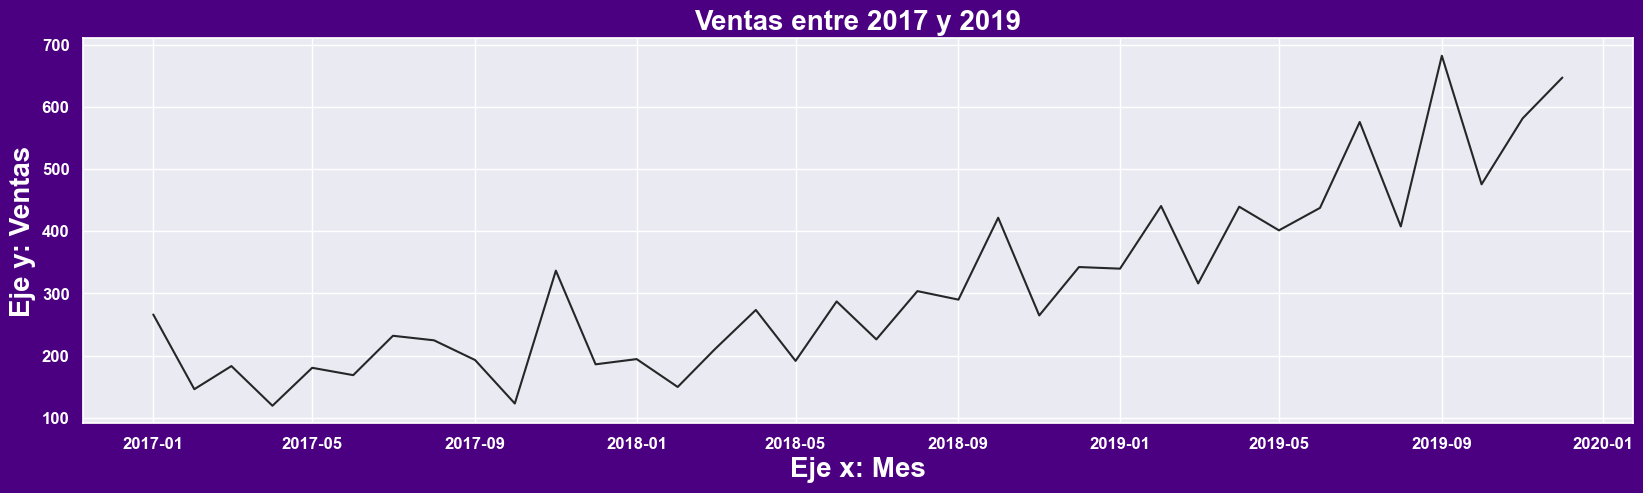

In [11]:
grafico('Ventas entre 2017 y 2019','Mes','Ventas','Eje x: Mes','Eje y: Ventas')

Descomposición de series temporales

In [12]:
ventas.head()

,Mes,Ventas
0,2017-01-01,266.0
1,2017-02-01,145.9
2,2017-03-01,183.1
3,2017-04-01,119.3
4,2017-05-01,180.3


In [13]:
ventas['Variación'] = ventas['Ventas'].diff()
ventas.head()

,Mes,Ventas,Variación
0,2017-01-01,266.0,NaN
1,2017-02-01,145.9,-120.1
2,2017-03-01,183.1,37.2
3,2017-04-01,119.3,-63.8
4,2017-05-01,180.3,61.0


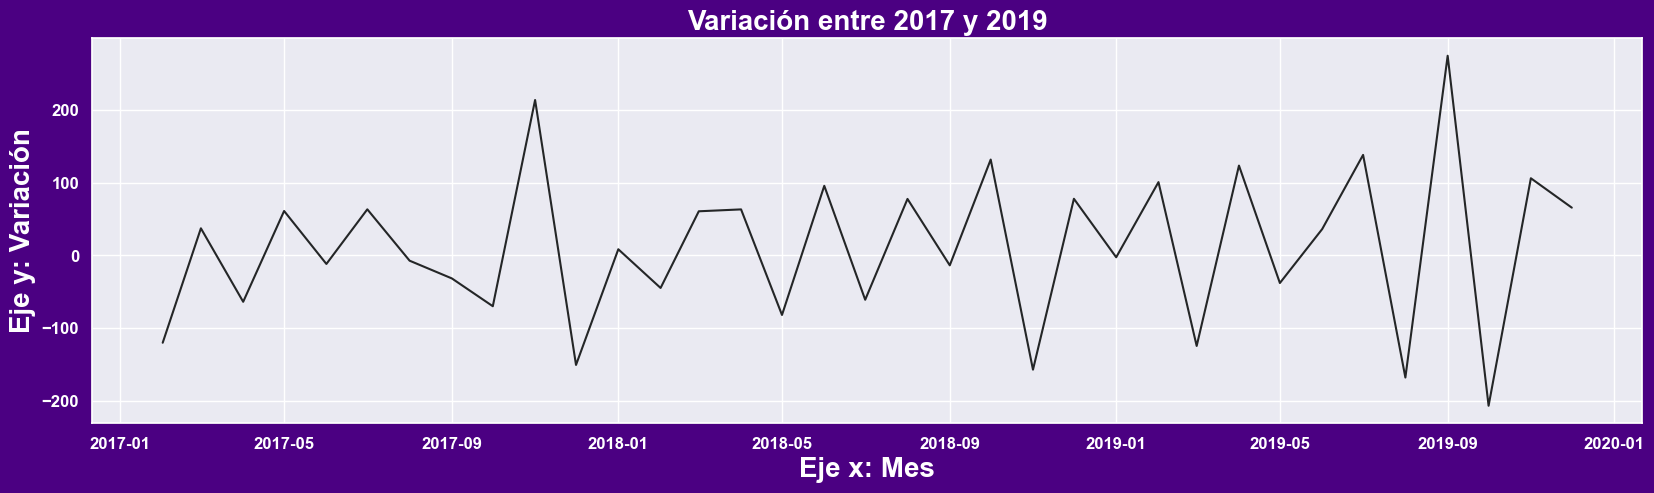

In [14]:
grafico('Variación entre 2017 y 2019','Mes','Variación','Eje x: Mes','Eje y: Variación')

In [15]:
ventas['Aceleración'] = ventas['Variación'].diff()
ventas.head()

,Mes,Ventas,Variación,Aceleración
0,2017-01-01,266.0,NaN,NaN
1,2017-02-01,145.9,-120.1,NaN
2,2017-03-01,183.1,37.2,157.3
3,2017-04-01,119.3,-63.8,-101.0
4,2017-05-01,180.3,61.0,124.8


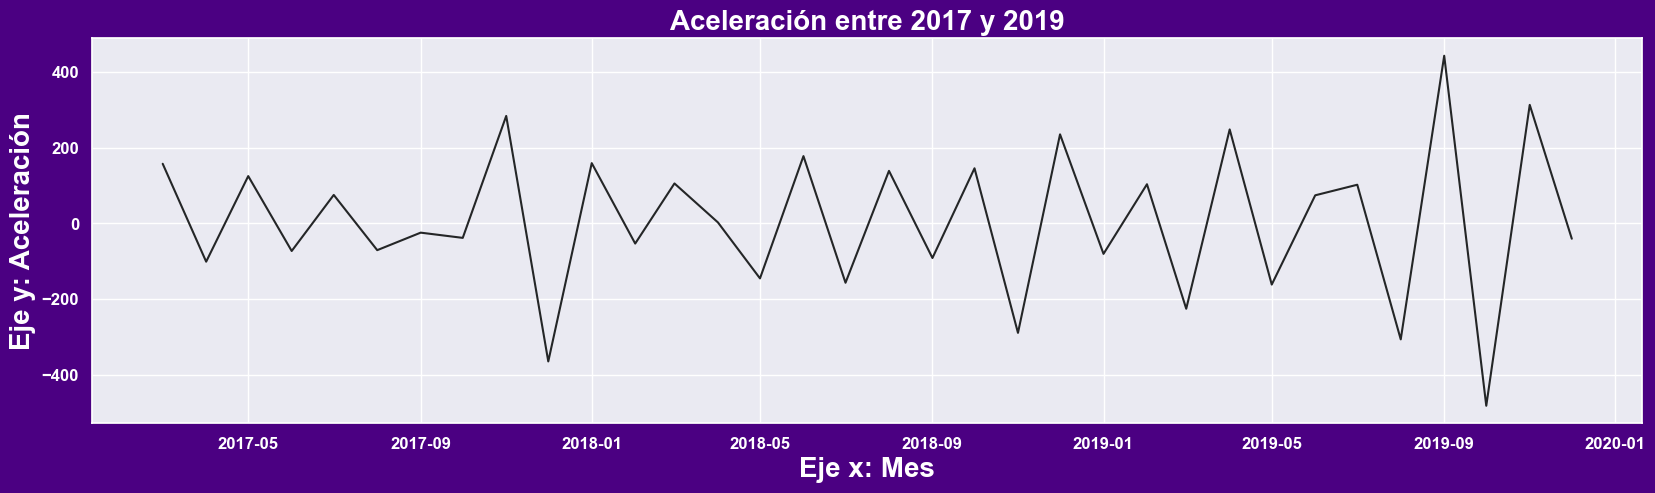

In [16]:
grafico('Aceleración entre 2017 y 2019','Mes','Aceleración','Eje x: Mes','Eje y: Aceleración')

In [17]:
def comparacion_grafico(titulo, dataset, x, y1, y2, y3):
    plt.figure(figsize=(20, 5), facecolor='indigo')
    sns.set(style="darkgrid")
    sns.set_palette('dark:skyblue')
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, color='w', size=20, fontweight='bold', loc='center')
    sns.lineplot(data=dataset, x=x, y=y1 )
    plt.subplot(3,1,2)
    sns.lineplot(data=dataset, x=x, y=y2 )
    plt.subplot(3,1,3)
    sns.lineplot(data=dataset, x=x, y=y3 )
    

    plt.xlabel(x, color='w', fontweight='bold', size=20)
    plt.ylabel(y1, color='w',fontweight='bold', size=20)
    plt.ylabel(y2, color='w',fontweight='bold', size=20)
    plt.ylabel(y3, color='w',fontweight='bold', size=20)
    plt.xticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje x sean más gruesos
    plt.yticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje y sean más gruesos
    ax=ax

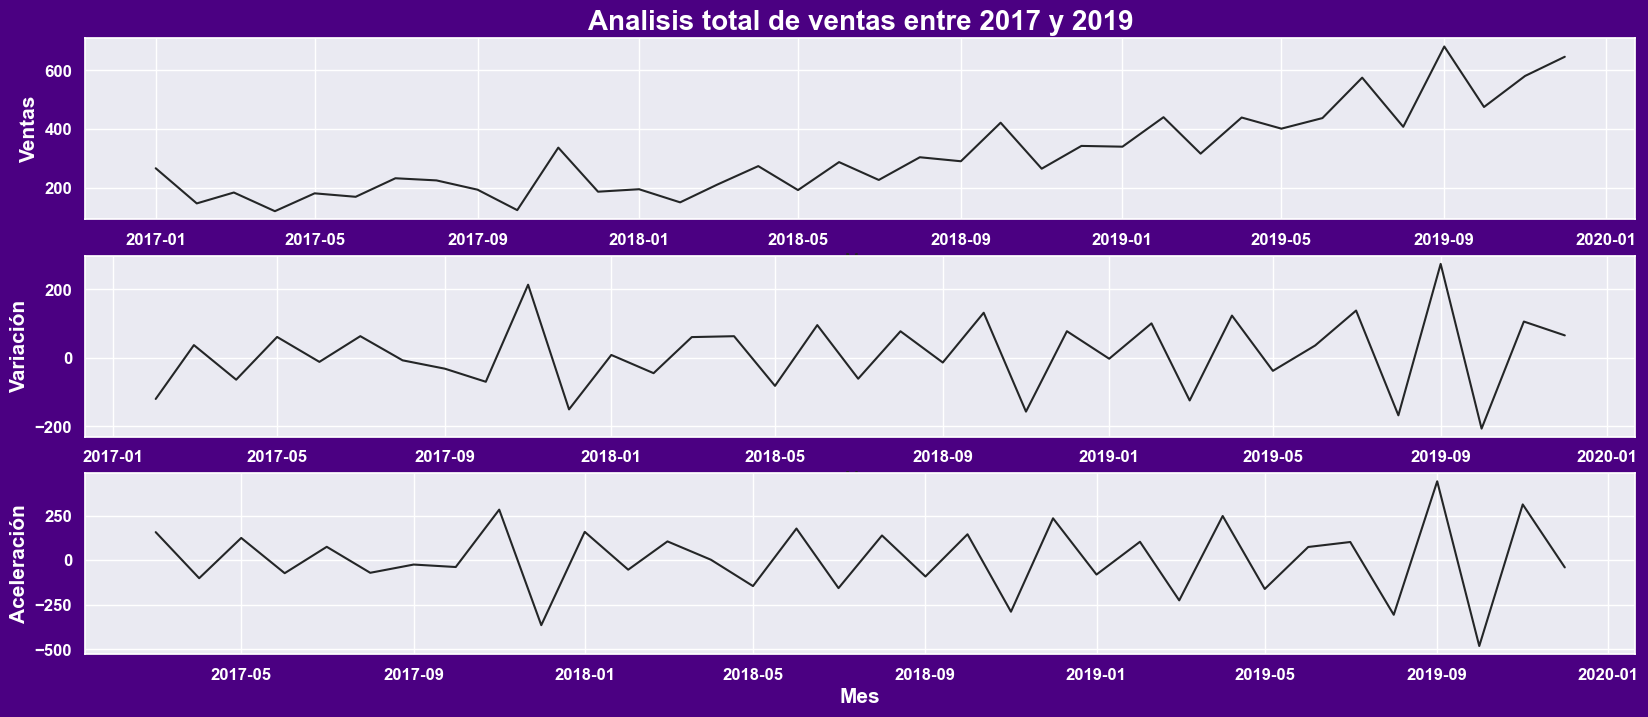

In [18]:
def comparacion_grafico(titulo, dataset, x, y1, y2, y3):
    plt.figure(figsize=(20, 8), facecolor='indigo')
    sns.set(style="darkgrid")
    sns.set_palette('dark:skyblue')
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, color='w', size=20, fontweight='bold', loc='center')
    sns.lineplot(data=dataset, x=x, y=y1 )
    plt.ylabel(y1, color='w',fontweight='bold', size=15)
    plt.xticks(fontweight='bold', fontsize=12, color='white')
    plt.yticks(fontweight='bold', fontsize=12, color='white')  
    plt.subplot(3,1,2)
    sns.lineplot(data=dataset, x=x, y=y2 )
    plt.ylabel(y2, color='w',fontweight='bold', size=15)
    plt.xticks(fontweight='bold', fontsize=12, color='white')
    plt.yticks(fontweight='bold', fontsize=12, color='white')  
    plt.subplot(3,1,3)
    plt.ylabel(y3, color='w',fontweight='bold', size=15)
    plt.xticks(fontweight='bold', fontsize=12, color='white')
    plt.yticks(fontweight='bold', fontsize=12, color='white')  
    sns.lineplot(data=dataset, x=x, y=y3 )
    plt.xlabel(x, color='w', fontweight='bold', size=15)
    plt.show()
comparacion_grafico('Analisis total de ventas entre 2017 y 2019', ventas, 'Mes', 'Ventas', 'Variación', 'Aceleración')


 Autocorrelación

In [19]:
from pandas.plotting import autocorrelation_plot

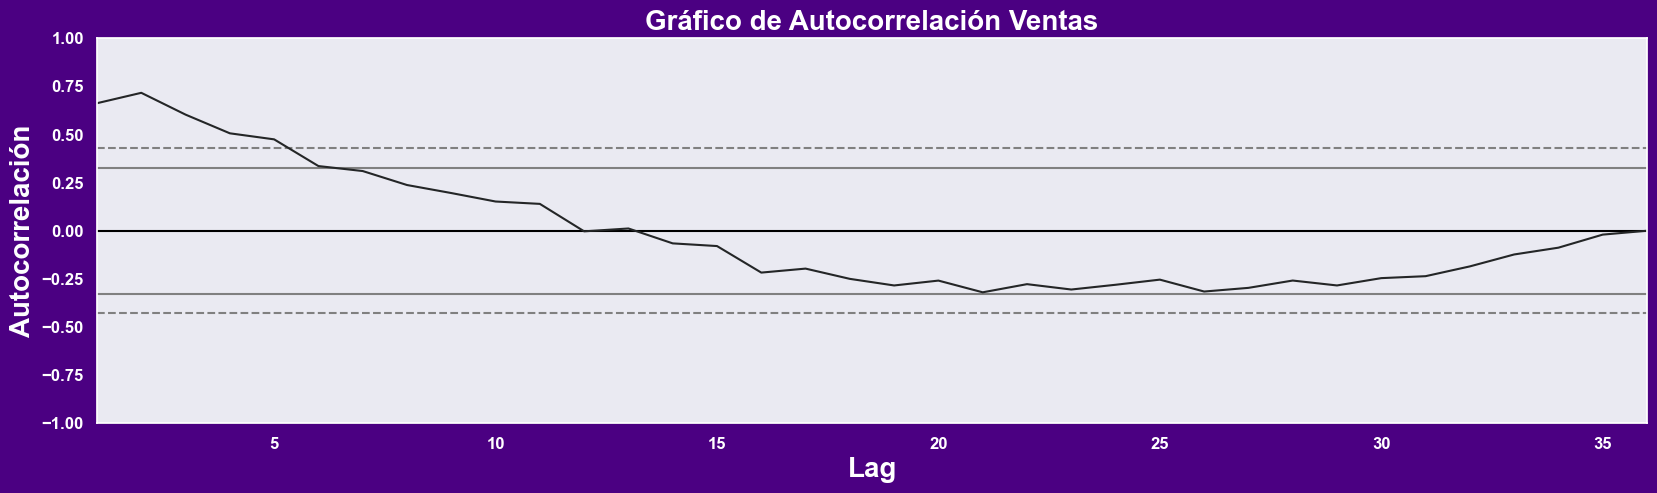

In [20]:
def autocorrelacion():
    plt.figure(figsize=(20, 5), facecolor='indigo')
    autocorrelation_plot(ventas['Ventas'])
    plt.title('Gráfico de Autocorrelación Ventas',color='w', size=20, fontweight='bold', loc='center')
    plt.xlabel('Lag',color='w', fontweight='bold', size=20)
    plt.ylabel('Autocorrelación',color='w',fontweight='bold', size=20)
    plt.xticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje x sean más gruesos
    plt.yticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje y sean más gruesos
    plt.show()
autocorrelacion()

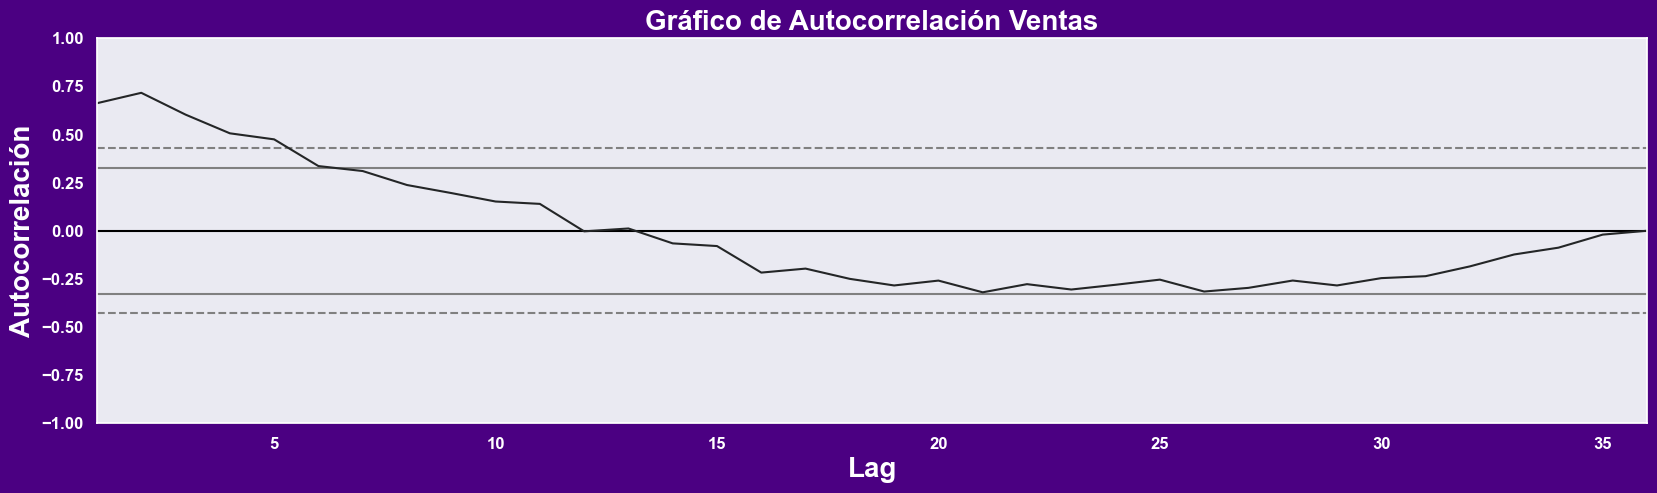

In [21]:
def autocorrelacion():
    plt.figure(figsize=(20, 5), facecolor='indigo')
    autocorrelation_plot(ventas['Ventas'])
    plt.title('Gráfico de Autocorrelación Ventas',color='w', size=20, fontweight='bold', loc='center')
    plt.xlabel('Lag',color='w', fontweight='bold', size=20)
    plt.ylabel('Autocorrelación',color='w',fontweight='bold', size=20)
    plt.xticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje x sean más gruesos
    plt.yticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje y sean más gruesos
    plt.show()
autocorrelacion()

Lo que aprendimos en esta aula:

Creamos las funciones grafico y comparacion_grafico para facilitar la generación de gráficos en nuestro programa de python.
Vimos las características de tendencia en nuestra serie temporal.
Utilizamos la función diff() para hacer una descomposición de nuestra serie temporal y creamos las columnas de Variación y Aceleración.
Definimos el concepto de autocorrelación y lo pusimos en práctica analizando nuestra base de datos de ventas.

Agrupamiento

Grupos

In [22]:
ventas.head()

,Mes,Ventas,Variación,Aceleración
0,2017-01-01,266.0,NaN,NaN
1,2017-02-01,145.9,-120.1,NaN
2,2017-03-01,183.1,37.2,157.3
3,2017-04-01,119.3,-63.8,-101.0
4,2017-05-01,180.3,61.0,124.8


In [23]:
agrup_ventas = ventas[['Mes','Ventas']].groupby(pd.Grouper(key='Mes', freq='Q')).sum()

In [24]:
agrup_ventas.head()

,Ventas
Mes,
2017-03-31,595.0
2017-06-30,468.1
2017-09-30,649.1
2017-12-31,645.3
2018-03-31,553.9


In [25]:
agrup_ventas = ventas[['Mes','Ventas']].groupby(pd.Grouper(key='Mes', freq='2M')).sum()


In [26]:
agrup_ventas.head()

,Ventas
Mes,
2017-01-31,266.0
2017-03-31,329.0
2017-05-31,299.6
2017-07-31,400.3
2017-09-30,417.3


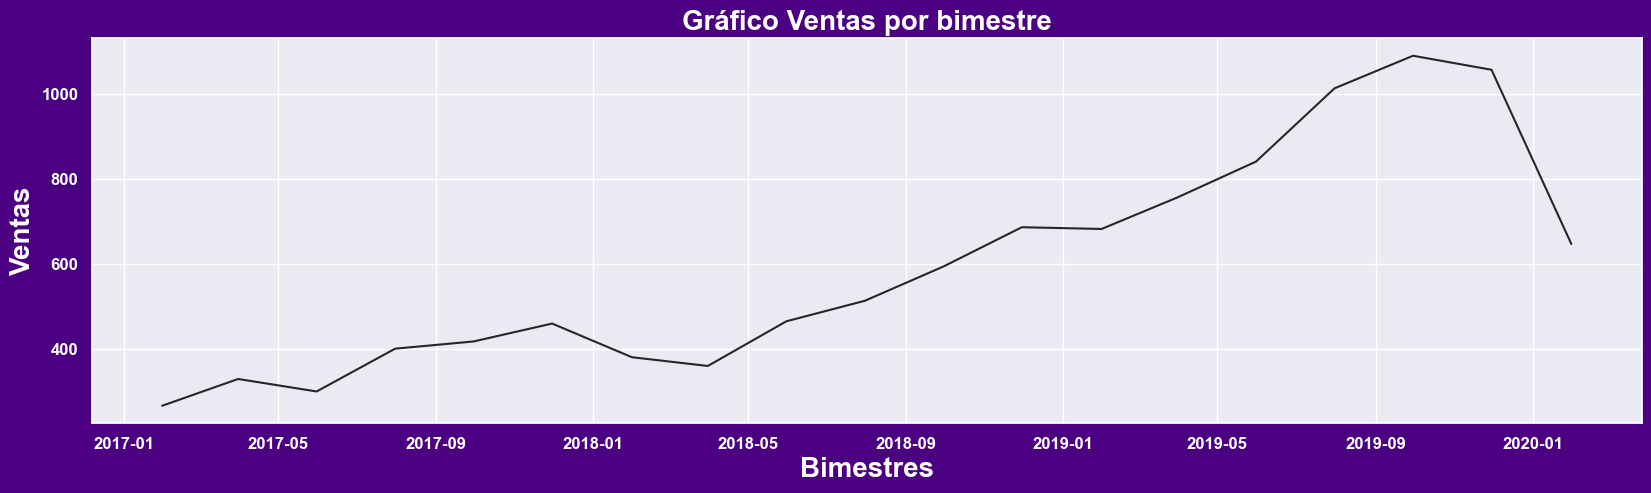

In [27]:
def autocorrelacion():
    plt.figure(figsize=(20, 5), facecolor='indigo')
    sns.lineplot(x='Mes', y='Ventas', data=agrup_ventas);
    plt.title('Gráfico Ventas por bimestre',color='w', size=20, fontweight='bold', loc='center')
    plt.xlabel('Bimestres',color='w', fontweight='bold', size=20)
    plt.ylabel('Ventas',color='w',fontweight='bold', size=20)
    plt.xticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje x sean más gruesos
    plt.yticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje y sean más gruesos
    plt.show()
autocorrelacion()

In [28]:
agrup_ventas = ventas[['Mes','Ventas']].groupby(pd.Grouper(key='Mes', freq='Y')).sum()
agrup_ventas

,Ventas
Mes,
2017-12-31,2357.5
2018-12-31,3153.5
2019-12-31,5742.6


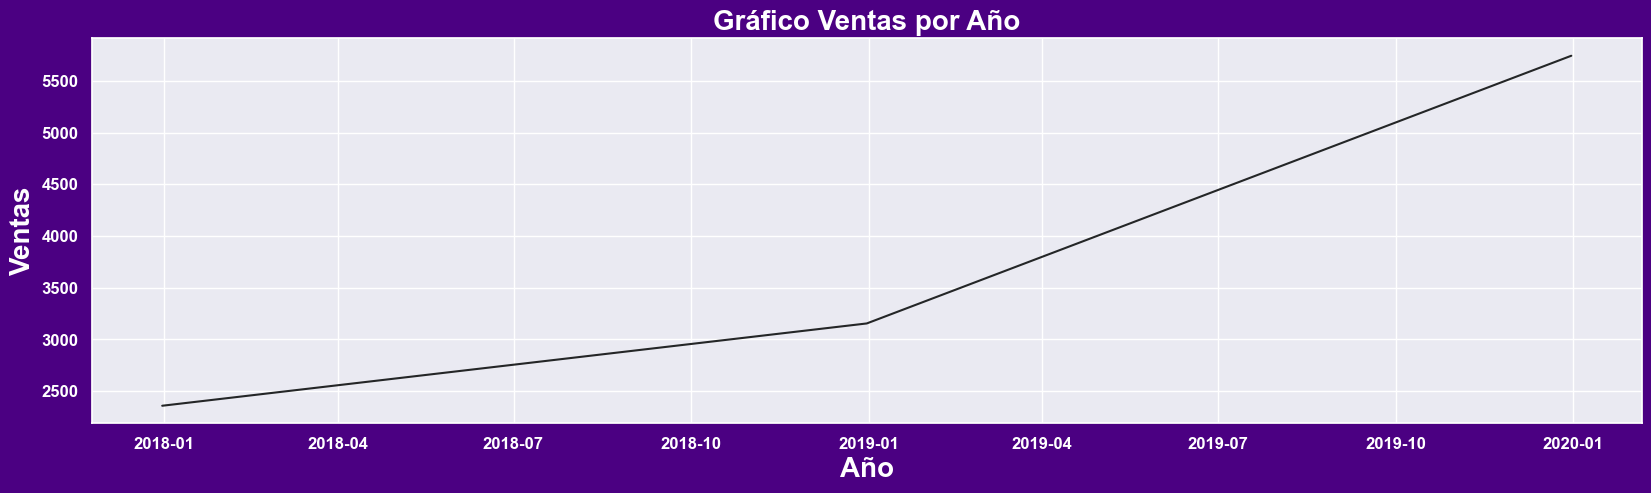

In [29]:
def autocorrelacion():
    plt.figure(figsize=(20, 5), facecolor='indigo')
    sns.lineplot(x='Mes', y='Ventas', data=agrup_ventas);
    plt.title('Gráfico Ventas por Año',color='w', size=20, fontweight='bold', loc='center')
    plt.xlabel('Año',color='w', fontweight='bold', size=20)
    plt.ylabel('Ventas',color='w',fontweight='bold', size=20)
    plt.xticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje x sean más gruesos
    plt.yticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje y sean más gruesos
    plt.show()
autocorrelacion()

Agrupamiento y estacionalidad

In [30]:
agrup_ventas = ventas[['Mes','Ventas']].groupby(pd.Grouper(key='Mes', freq='Q')).sum()
agrup_ventas

,Ventas
Mes,
2017-03-31,595.0
2017-06-30,468.1
2017-09-30,649.1
2017-12-31,645.3
2018-03-31,553.9
2018-06-30,751.7
2018-09-30,819.5
2018-12-31,1028.4
2019-03-31,1096.0


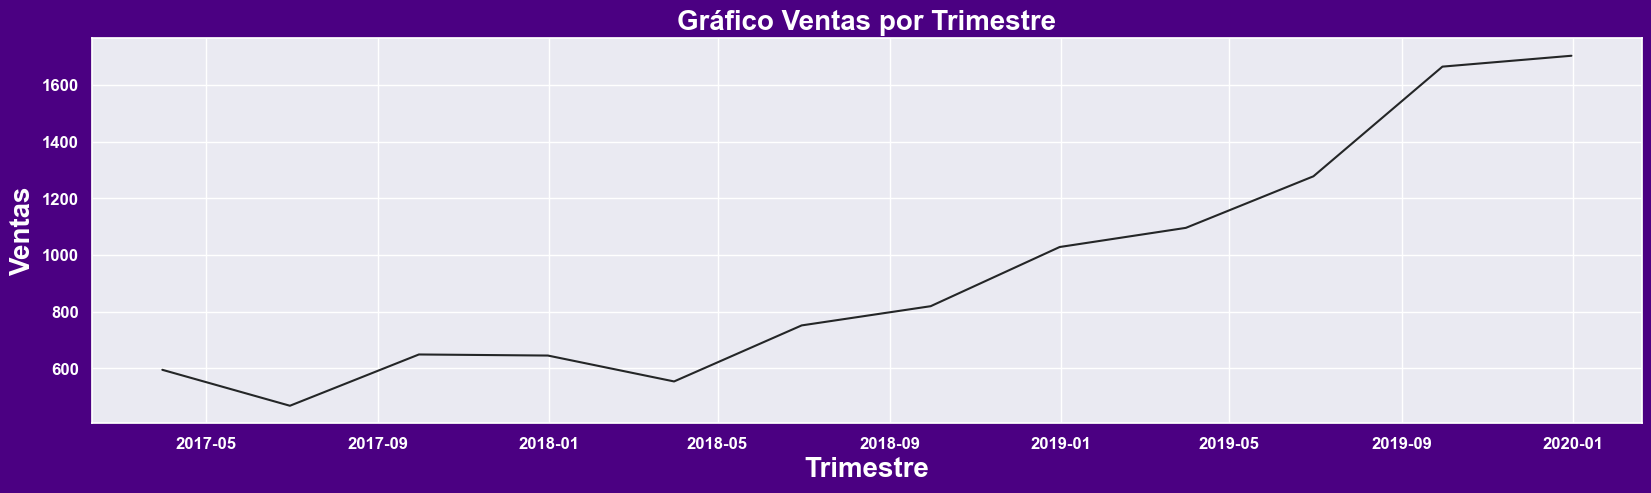

In [31]:
def autocorrelacion():
    plt.figure(figsize=(20, 5), facecolor='indigo')
    sns.lineplot(x='Mes', y='Ventas', data=agrup_ventas);
    plt.title('Gráfico Ventas por Trimestre',color='w', size=20, fontweight='bold', loc='center')
    plt.xlabel('Trimestre',color='w', fontweight='bold', size=20)
    plt.ylabel('Ventas',color='w',fontweight='bold', size=20)
    plt.xticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje x sean más gruesos
    plt.yticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje y sean más gruesos
    plt.show()
autocorrelacion()

Estacional

In [32]:
df = pd.read_csv('analisis_visitas_playa.csv', sep=';')
df.head()

,Mes,visitas
0,01/jan/04,78
1,01-feb-2004,72
2,01/mar/04,76
3,01-apr-2004,75
4,01-may-2004,80


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Mes      192 non-null    object
 1   visitas  192 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [34]:
df['Mes'] = pd.to_datetime(df['Mes'] )
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2380\3573261950.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Mes'] = pd.to_datetime(df['Mes'] )


,Mes,visitas
0,2004-01-01,78
1,2004-02-01,72
2,2004-03-01,76
3,2004-04-01,75
4,2004-05-01,80


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Mes      192 non-null    datetime64[ns]
 1   visitas  192 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [36]:
def grafico2(titulo, x, y , xlabel, ylabel, dataset):
    plt.figure(figsize=(20, 5), facecolor='indigo')
    sns.set(style="darkgrid")
    sns.set_palette('dark:skyblue')
    sns.lineplot(data=dataset, x=x, y=y)
    plt.title(titulo, color='w', size=20, fontweight='bold', loc='center')
    plt.xlabel(xlabel, color='w', fontweight='bold', size=20)
    plt.ylabel(ylabel, color='w',fontweight='bold', size=20)
    plt.xticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje x sean más gruesos
    plt.yticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje y sean más gruesos
    plt.legend(df, bbox_to_anchor=(1.01,0.5), loc='upper left')
    plt.show()

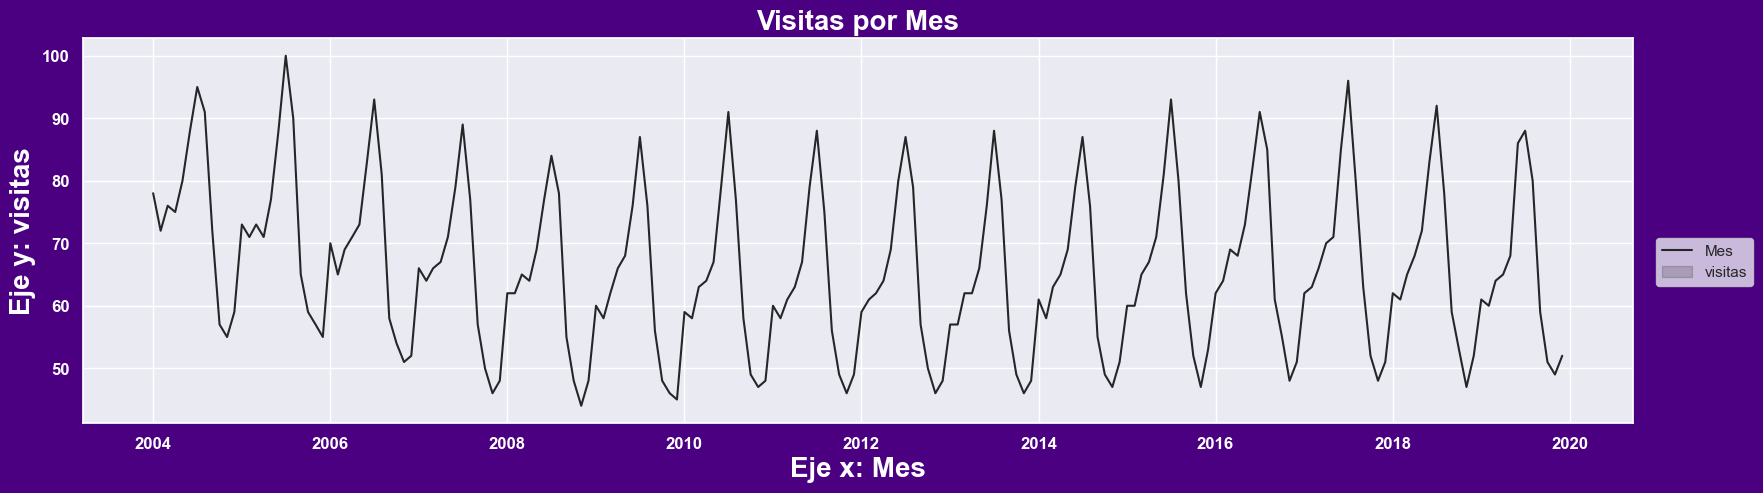

In [37]:
grafico2('Visitas por Mes', 'Mes', 'visitas' , 'Eje x: Mes', 'Eje y: visitas', df)

In [38]:
df['Variación'] = df['visitas'].diff()
df['Aceleración'] = df['Variación'].diff()
df.head()

,Mes,visitas,Variación,Aceleración
0,2004-01-01,78,NaN,NaN
1,2004-02-01,72,-6.0,NaN
2,2004-03-01,76,4.0,10.0
3,2004-04-01,75,-1.0,-5.0
4,2004-05-01,80,5.0,6.0


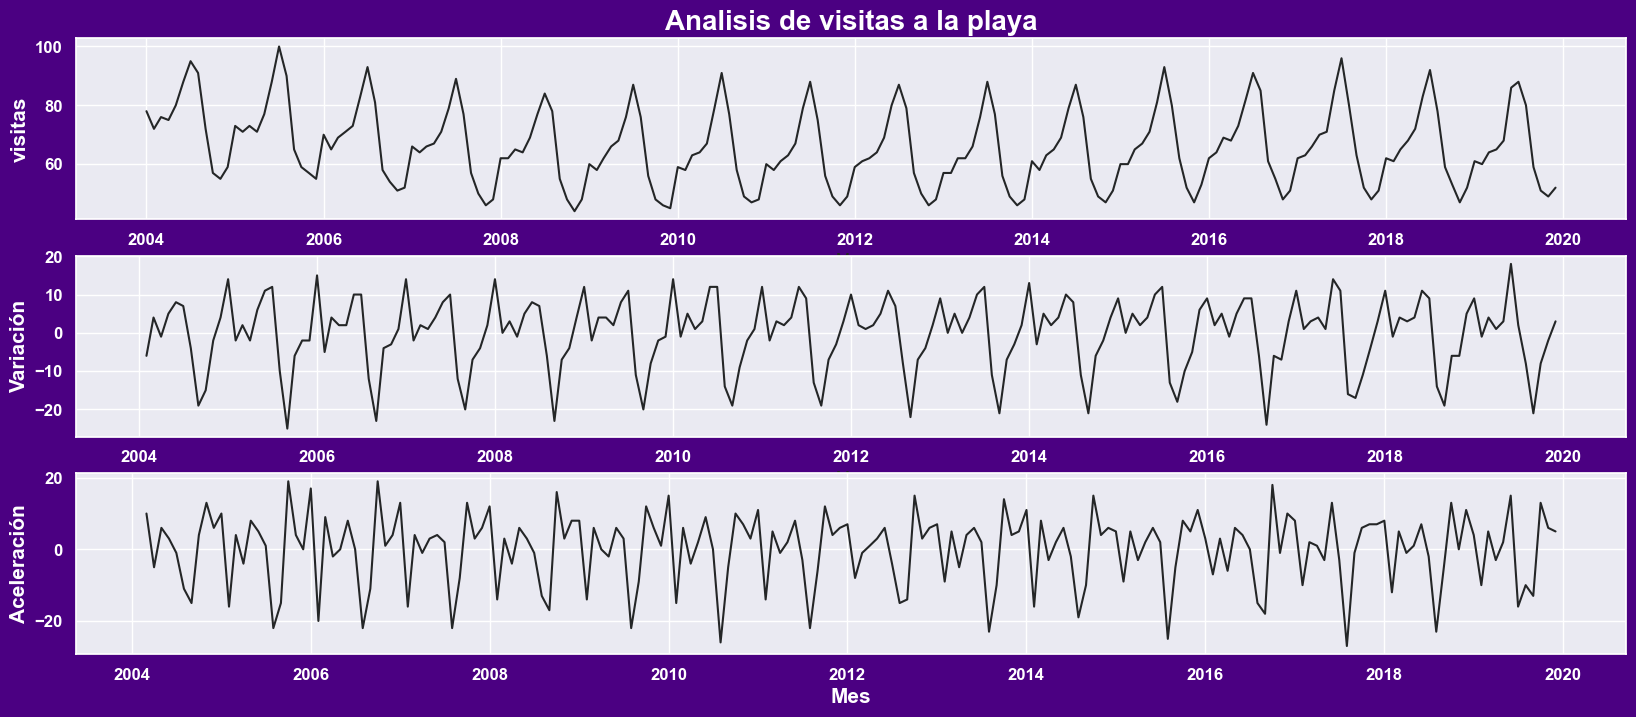

In [39]:
def comparacion_grafico(titulo, dataset, x, y1, y2, y3):
    plt.figure(figsize=(20, 8), facecolor='indigo')
    sns.set(style="darkgrid")
    sns.set_palette('dark:skyblue')
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, color='w', size=20, fontweight='bold', loc='center')
    sns.lineplot(data=dataset, x=x, y=y1 )
    plt.ylabel(y1, color='w',fontweight='bold', size=15)
    plt.xticks(fontweight='bold', fontsize=12, color='white')
    plt.yticks(fontweight='bold', fontsize=12, color='white')  
    plt.subplot(3,1,2)
    sns.lineplot(data=dataset, x=x, y=y2 )
    plt.ylabel(y2, color='w',fontweight='bold', size=15)
    plt.xticks(fontweight='bold', fontsize=12, color='white')
    plt.yticks(fontweight='bold', fontsize=12, color='white')  
    plt.subplot(3,1,3)
    plt.ylabel(y3, color='w',fontweight='bold', size=15)
    plt.xticks(fontweight='bold', fontsize=12, color='white')
    plt.yticks(fontweight='bold', fontsize=12, color='white')  
    sns.lineplot(data=dataset, x=x, y=y3 )
    plt.xlabel(x, color='w', fontweight='bold', size=15)
    plt.show()
comparacion_grafico('Analisis de visitas a la playa', df, 'Mes', 'visitas', 'Variación', 'Aceleración')

<Figure size 640x480 with 0 Axes>

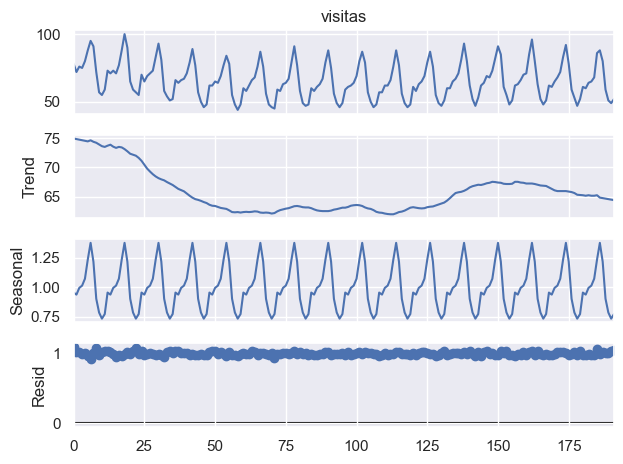

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(facecolor='indigo')
sns.set(style="darkgrid");
resultado = seasonal_decompose(df['visitas'], model='multiplicative', extrapolate_trend='freq', period=12);
resultado.plot();


In [41]:
observadas = resultado.observed
tendencia = resultado.trend
estacionalidad = resultado.seasonal
residuo = resultado.resid

In [42]:
data = ({
    'observadas' : observadas ,
    'tendencia' : tendencia ,
    'estacionalidad' : estacionalidad,
    'residuo' : residuo
})

In [43]:
df_decompose = pd.DataFrame(data)

In [44]:
df_decompose.head()

,observadas,tendencia,estacionalidad,residuo
0,78.0,74.936334,0.955242,1.089654
1,72.0,74.837704,0.937909,1.025773
2,76.0,74.739073,0.995022,1.021959
3,75.0,74.640443,1.014457,0.990498
4,80.0,74.541812,1.072780,1.000413


Lo que aprendimos en esta aula:

Introducimos la función pd.Grouper que nos permite agrupar nuestra serie temporal en otra frecuencia.
Presentamos las fuentes de variación de una serie temporal y hablamos del segundo componente de ellos, el componente estacional o cíclico.
Analizamos nuestra serie temporal usando la biblioteca de pandas statsmodels.tsa.seasonal con la función seasonal_decompose. Esta función nos muestra la variable observada y un análisis de la tendencia, la estacionalidad y los residuos.
Aprendimos a separar los componentes de la función seasonal_decompose en un nuevo DataFrame.

Series Estacionarias

In [45]:
nacimientos = pd.read_csv('nacimientos.csv', sep=';')
nacimientos.head()

,Dia,Nacimientos
0,01/01/2019,35
1,02/01/2019,32
2,03/01/2019,30
3,04/01/2019,31
4,05/01/2019,44


In [46]:
nacimientos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Dia          365 non-null    object
 1   Nacimientos  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [47]:
nacimientos['Dia'] = pd.to_datetime(nacimientos['Dia'], format='mixed')
nacimientos.head()

,Dia,Nacimientos
0,2019-01-01,35
1,2019-02-01,32
2,2019-03-01,30
3,2019-04-01,31
4,2019-05-01,44


In [48]:
nacimientos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Dia          365 non-null    datetime64[ns]
 1   Nacimientos  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


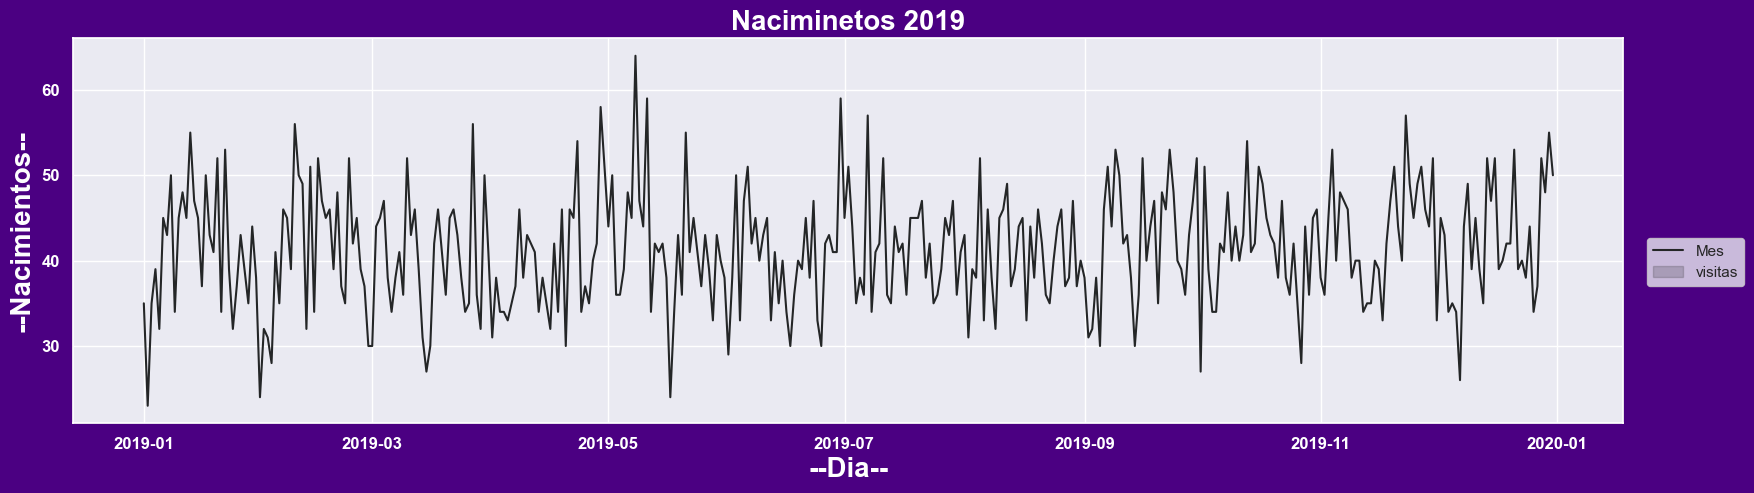

In [49]:
grafico2('Naciminetos 2019', 'Dia','Nacimientos', '--Dia--', '--Nacimientos--',nacimientos)

In [50]:
from statsmodels.tsa.stattools import adfuller

In [51]:
x = nacimientos['Nacimientos']
result = adfuller(x)
len(result)
result

(-16.3658899464954,
 2.841025518443939e-29,
 0,
 364,
 {'1%': -3.4484434475193777,
  '5%': -2.869513170510808,
  '10%': -2.571017574266393},
 2303.141806063879)

In [52]:
print(f'ADF static: {result[0]}')
print(f'P-value: {result[1]}')
print(f'Valores Criticos: ')
for key, value in result[4].items():
    print(f'{key} {round(value, 3)}')

ADF static: -16.3658899464954
P-value: 2.841025518443939e-29
Valores Criticos: 
1% -3.448
5% -2.87
10% -2.571


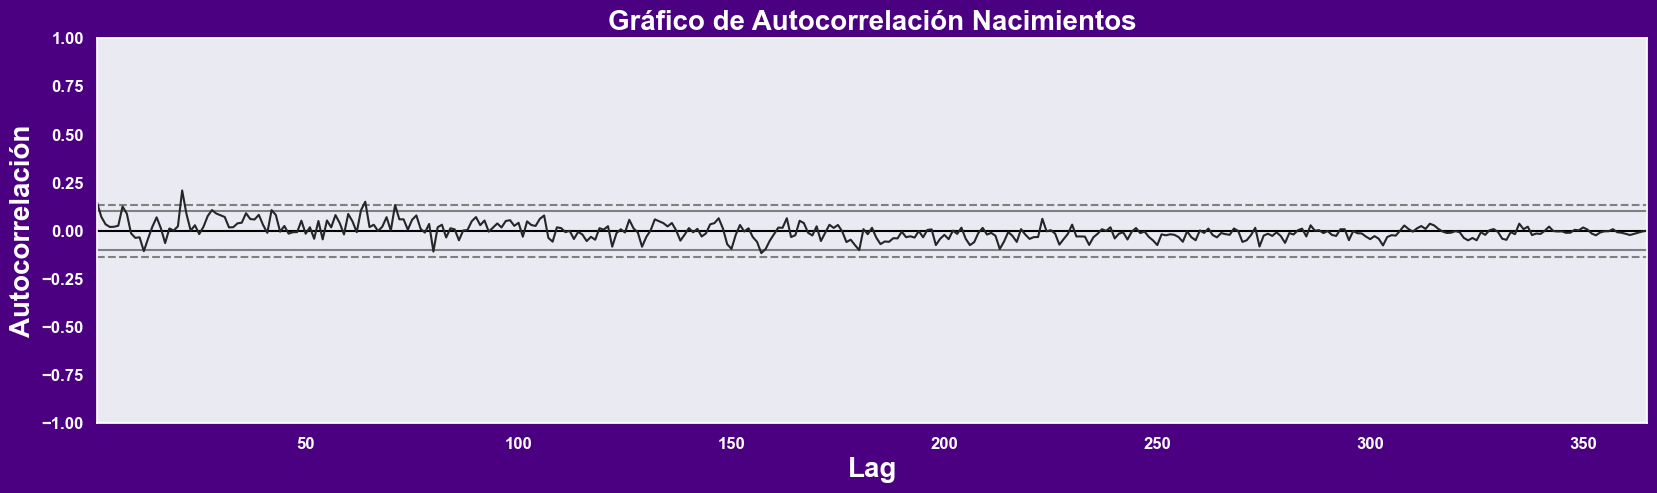

In [53]:
def autocorrelacion():
    plt.figure(figsize=(20, 5), facecolor='indigo')
    autocorrelation_plot(nacimientos['Nacimientos']);
    plt.title('Gráfico de Autocorrelación Nacimientos',color='w', size=20, fontweight='bold', loc='center')
    plt.xlabel('Lag',color='w', fontweight='bold', size=20)
    plt.ylabel('Autocorrelación',color='w',fontweight='bold', size=20)
    plt.xticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje x sean más gruesos
    plt.yticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje y sean más gruesos
    plt.show()
autocorrelacion()

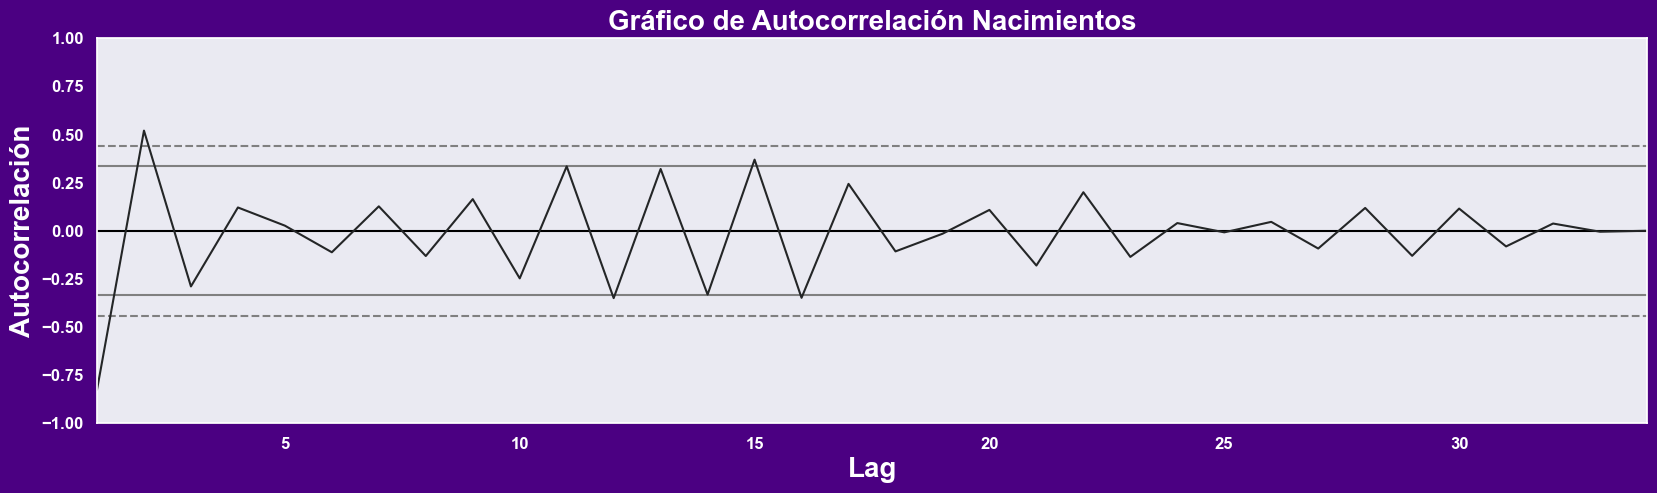

In [54]:
def autocorrelacion():
    plt.figure(figsize=(20, 5), facecolor='indigo')
    autocorrelation_plot(ventas['Aceleración'].dropna());
    plt.title('Gráfico de Autocorrelación Nacimientos',color='w', size=20, fontweight='bold', loc='center')
    plt.xlabel('Lag',color='w', fontweight='bold', size=20)
    plt.ylabel('Autocorrelación',color='w',fontweight='bold', size=20)
    plt.xticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje x sean más gruesos
    plt.yticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje y sean más gruesos
    plt.show()
autocorrelacion()

Componente Aleatorio

In [56]:
precio = pd.read_csv('stock_price.csv', sep=';')
precio.head()

,Date,Adj Close
0,03/02/2016,25.875280
1,04/02/2016,26.254505
2,05/02/2016,25.610708
3,08/02/2016,25.416685
4,09/02/2016,25.407873


In [58]:
precio['Date'] = pd.to_datetime(precio['Date'], format='mixed')
precio.head()

,Date,Adj Close
0,2016-03-02,25.875280
1,2016-04-02,26.254505
2,2016-05-02,25.610708
3,2016-08-02,25.416685
4,2016-09-02,25.407873


In [90]:
precio.tail()

,Date,Adj Close
1254,2021-01-27,53.590000
1255,2021-01-28,56.070000
1256,2021-01-29,55.509998
1257,2021-01-02,56.689999
1258,2021-02-02,58.000000


In [59]:
precio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Adj Close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [64]:
precio[['Adj Close']].describe()

,Adj Close
count,1259.000000
mean,43.337561
std,10.024418
min,24.887539
25%,33.029026
50%,45.060001
75%,50.272879
max,66.808777


In [67]:
def autocorrelacion():
    plt.figure(figsize=(20, 5), facecolor='indigo')
    autocorrelation_plot(precio['Adj Close'].dropna());
    plt.title('Gráfico de Autocorrelación Adj Close',color='w', size=20, fontweight='bold', loc='center')
    plt.xlabel('Lag',color='w', fontweight='bold', size=20)
    plt.ylabel('Autocorrelación',color='w',fontweight='bold', size=20)
    plt.xticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje x sean más gruesos
    plt.yticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje y sean más gruesos
    plt.show()

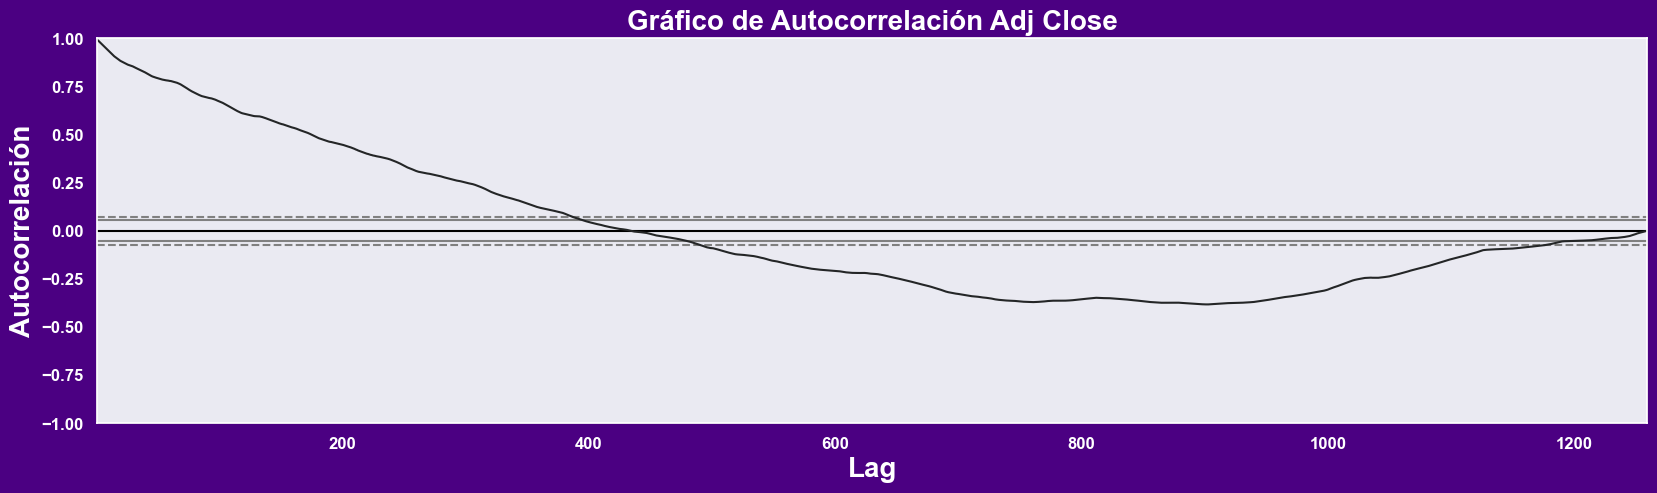

In [68]:
autocorrelacion()

In [88]:
def grafico3(titulo, x, y , xlabel, ylabel, dataset):
    plt.figure(figsize=(20, 5), facecolor='indigo')
    sns.set(style="darkgrid")
    sns.set_palette('dark:skyblue')
    sns.lineplot(data=dataset, x=x, y=y)
    plt.title(titulo, color='w', size=20, fontweight='bold', loc='center')
    plt.xlabel(xlabel, color='w', fontweight='bold', size=20)
    plt.ylabel(ylabel, color='w',fontweight='bold', size=20)
    plt.xticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje x sean más gruesos
    plt.yticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje y sean más gruesos
    plt.legend(precio, bbox_to_anchor=(1.01,0.5), loc='upper left')
    plt.show()

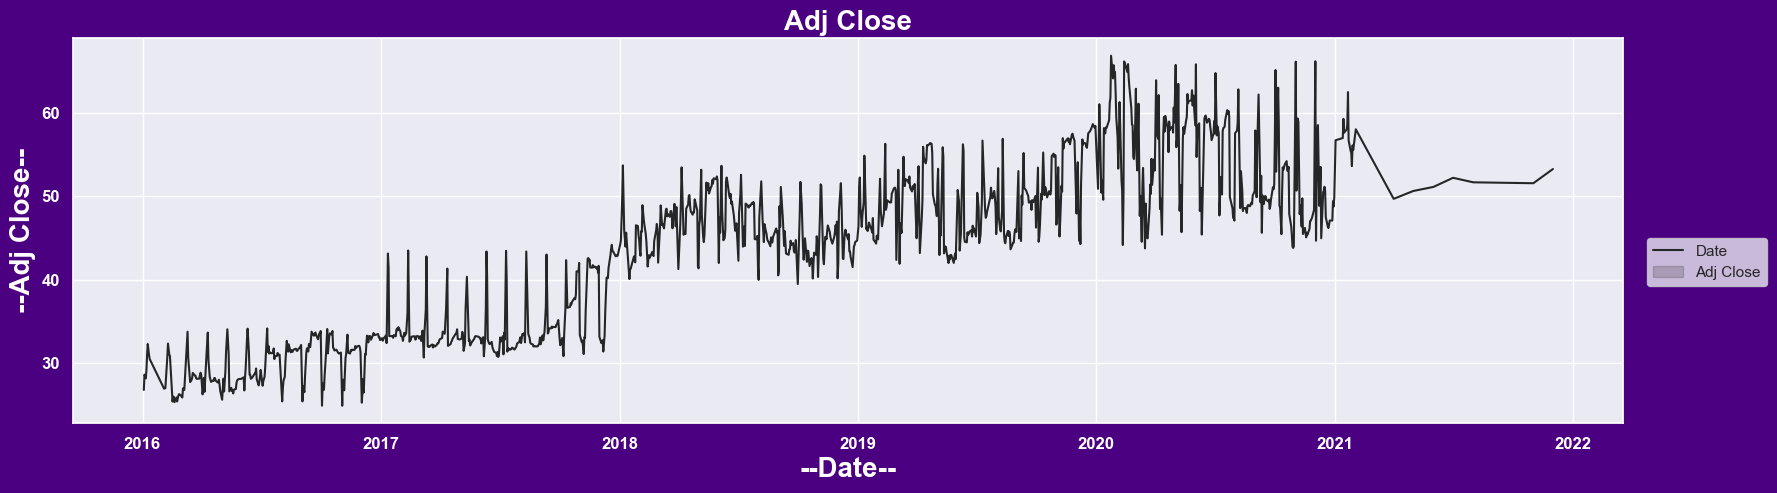

In [89]:
grafico3('Adj Close', 'Date','Adj Close', '--Date--', '--Adj Close--',precio)

In [91]:
def grafico3(titulo, x, y , xlabel, ylabel, dataset):
    plt.figure(figsize=(20, 5), facecolor='indigo')
    sns.set(style="darkgrid")
    sns.set_palette('dark:skyblue')
    precio['Adj Close'].plot()
    plt.title(titulo, color='w', size=20, fontweight='bold', loc='center')
    plt.xlabel(xlabel, color='w', fontweight='bold', size=20)
    plt.ylabel(ylabel, color='w',fontweight='bold', size=20)
    plt.xticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje x sean más gruesos
    plt.yticks(fontweight='bold', fontsize=12, color='white')  # Haz que los números del eje y sean más gruesos
    plt.legend(precio, bbox_to_anchor=(1.01,0.5), loc='upper left')
    plt.show()

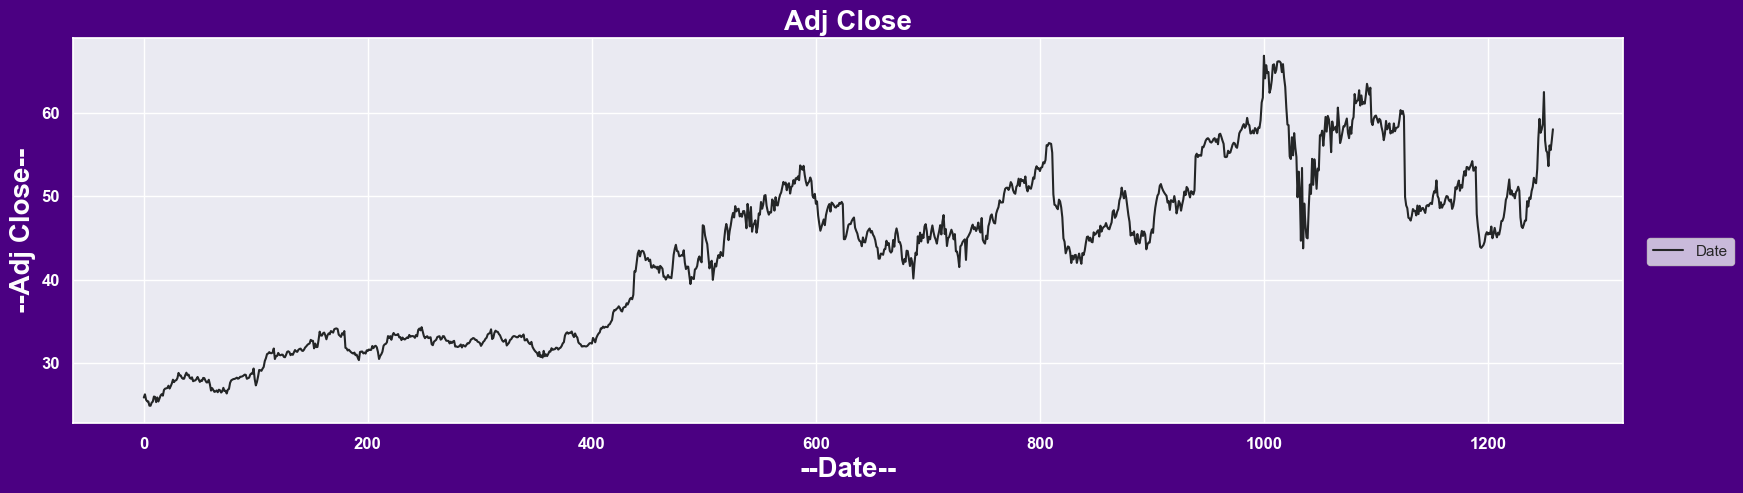

In [92]:
grafico3('Adj Close', 'Date','Adj Close', '--Date--', '--Adj Close--',precio)

Medias Móviles

In [119]:
precio['mm30'] = precio['Adj Close'].rolling(30).mean()
precio['mm60'] = precio['Adj Close'].rolling(60).mean()

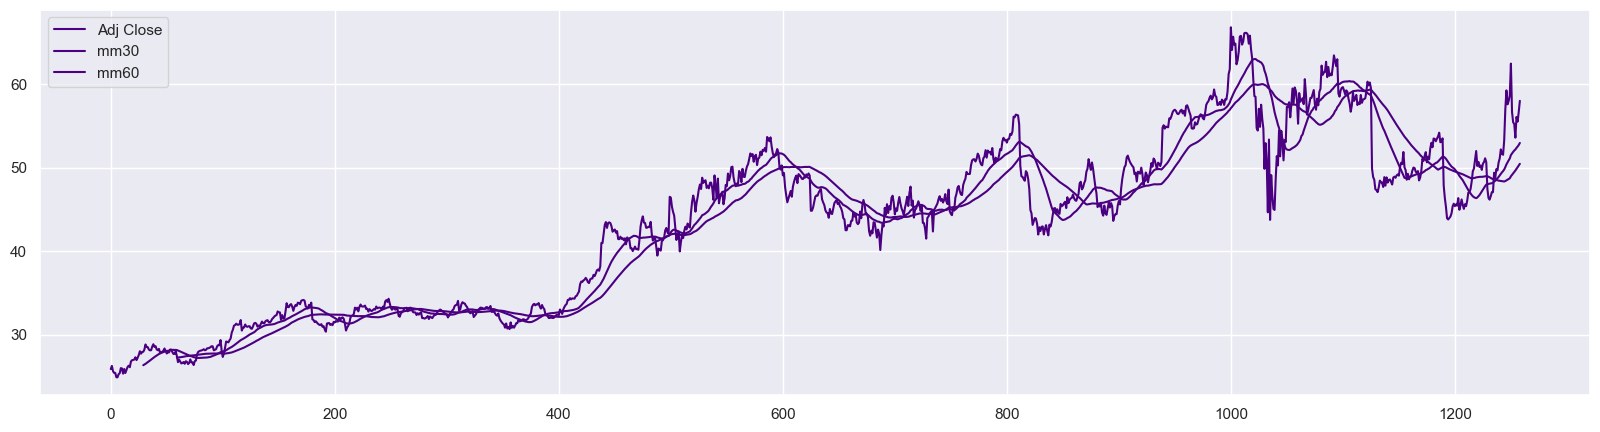

In [116]:
precio[['Adj Close', 'mm30', 'mm60']].plot(figsize=(20,5), style='indigo');

Lo que aprendimos en esta aula:

Presentamos y definimos el último componente de una serie temporal, el componente aleatorio.
Introducimos el concepto de médias móviles como una forma de comprender el comportamiento de una serie temporal.
Usamos las medias móviles para encontrar la tendencia de nuestra variable y poder interpretar de mejor forma su comportamiento.